In [7]:
!pip install  ACO-Pants --break-system-packages

Defaulting to user installation because normal site-packages is not writeable


In [8]:
from __future__ import print_function

import math
import random
import numpy

import pants  # Importando a biblioteca ACO-Pants


class TSPSolver:
    """
    Classe para resolver o Problema do Caixeiro Viajante (TSP) usando o algoritmo de colônia de formigas (ACO).
    """

    def __init__(self, num_cidades, min_distancia, max_distancia):
        """
        Inicializa o solucionador TSP com o número de cidades e limites de distância.

        Args:
            num_cidades: Número de cidades (vértices) no grafo.
            min_distancia: Menor valor de distância entre duas cidades.
            max_distancia: Maior valor de distância entre duas cidades.
        """
        self.num_cidades = num_cidades
        self.min_distancia = min_distancia
        self.max_distancia = max_distancia
        self.grafo = self.gerar_grafo()

    def gerar_grafo(self):
        """
        Gera a matriz de distâncias (grafo) para o TSP.

        Returns:
            numpy.ndarray: Matriz de distâncias numCities x numCities.
        """
        grafo = numpy.zeros((self.num_cidades, self.num_cidades), dtype=int)
        for i in range(self.num_cidades):
            for j in range(self.num_cidades):
                if j > i:
                    grafo[i, j] = random.randint(self.min_distancia, self.max_distancia)
                elif j < i:
                    grafo[i, j] = grafo[j, i]
        return grafo

    def calcular_distancia(self, cidade1, cidade2):
        """
        Calcula a distância (custo) entre duas cidades.

        Args:
            cidade1: Índice da cidade de origem.
            cidade2: Índice da cidade de destino.

        Returns:
            int: Distância entre as cidades.
        """
        return self.grafo[cidade1][cidade2]

    def resolver(self):
        """
        Executa o algoritmo ACO para encontrar a melhor rota.

        Returns:
            pants.Solution: Objeto com a melhor rota encontrada e seu custo total.
        """
        # Criando os nós do grafo
        nos = list(range(self.num_cidades))

        # Criando o mundo do TSP com os nós e a função de distância
        mundo = pants.World(nos, self.calcular_distancia)

        # Criando o solver
        solver = pants.Solver()

        # Encontrando a melhor solução
        solucao = solver.solve(mundo)

        return solucao


if __name__ == "__main__":
    # Número de cidade inicial
    num_cidades = 5

    while True:
        num_cidades = int(input("Digite o número de cidades: "))
        if num_cidades > 4:
            break
        else:
            print("O número de cidades deve ser maior que 4!")

    # Criando o solucionador TSP
    solver = TSPSolver(num_cidades, 10, 100)

    # Executando o algoritmo e imprimindo os resultados
    solucao = solver.resolver()
    print("Caminho:", solucao.tour)  # Nós visitados
    print("Custo Total:", solucao.distance)  # Custo do melhor caminho encontrado

Caminho: [7, 2, 5, 1, 9, 4, 6, 0, 8, 3]
Custo Total: 248


Caminho: [2, 3, 4, 1, 0, 8, 9, 6, 7, 5]
Custo Total: 368
Caminho: [7, 6, 9, 8, 0, 1, 4, 3, 2, 5]
Custo Total: 368


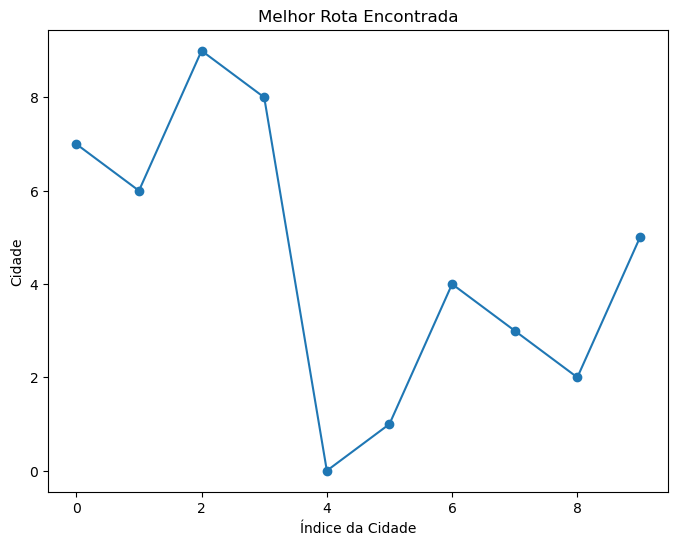

In [9]:
from __future__ import print_function

import math
import random
import numpy

import pants  # Importando a biblioteca ACO-Pants
import matplotlib.pyplot as plt


class TSPSolver:
    """
    Classe para resolver o Problema do Caixeiro Viajante (TSP) usando o algoritmo de colônia de formigas (ACO).
    """

    def __init__(self, num_cidades, min_distancia, max_distancia):
        """
        Inicializa o solucionador TSP com o número de cidades e limites de distância.

        Args:
            num_cidades: Número de cidades (vértices) no grafo.
            min_distancia: Menor valor de distância entre duas cidades.
            max_distancia: Maior valor de distância entre duas cidades.
        """
        self.num_cidades = num_cidades
        self.min_distancia = min_distancia
        self.max_distancia = max_distancia
        self.grafo = self.gerar_grafo()

    def gerar_grafo(self):
        """
        Gera a matriz de distâncias (grafo) para o TSP.

        Returns:
            numpy.ndarray: Matriz de distâncias numCities x numCities.
        """
        grafo = numpy.zeros((self.num_cidades, self.num_cidades), dtype=int)
        for i in range(self.num_cidades):
            for j in range(self.num_cidades):
                if j > i:
                    grafo[i, j] = random.randint(self.min_distancia, self.max_distancia)
                elif j < i:
                    grafo[i, j] = grafo[j, i]
        return grafo

    def calcular_distancia(self, cidade1, cidade2):
        """
        Calcula a distância (custo) entre duas cidades.

        Args:
            cidade1: Índice da cidade de origem.
            cidade2: Índice da cidade de destino.

        Returns:
            int: Distância entre as cidades.
        """
        return self.grafo[cidade1][cidade2]

    def resolver(self):
        """
        Executa o algoritmo ACO para encontrar a melhor rota.

        Returns:
            pants.Solution: Objeto com a melhor rota encontrada e seu custo total.
        """
        # Criando os nós do grafo
        nos = list(range(self.num_cidades))

        # Criando o mundo do TSP com os nós e a função de distância
        mundo = pants.World(nos, self.calcular_distancia)

        # Criando o solver
        solver = pants.Solver()

        # Encontrando a melhor solução
        solucao = solver.solve(mundo)

        return solucao

    def plotar_evolucao(self, logbook):
        """
        Plota a evolução do fitness ao longo das gerações.

        Args:
            logbook: Objeto Logbook do algoritmo ACO.
        """
        geracoes = logbook.select("gen")
        fitness_minimos = logbook.select("min")
        fitness_medios = logbook.select("avg")
        fitness_maximos = logbook.select("max")

        plt.plot(geracoes, fitness_minimos, label="Mínimo")
        plt.plot(geracoes, fitness_medios, label="Média")
        plt.plot(geracoes, fitness_maximos, label="Máximo")
        plt.xlabel("Geração")
        plt.ylabel("Fitness")
        plt.legend()
        plt.title("Evolução do Fitness ao Longo das Gerações")
        plt.show()


if __name__ == "__main__":
    # Número de cidade inicial
    num_cidades = 5

    while True:
        num_cidades = int(input("Digite o número de cidades: "))
        if num_cidades > 4:
            break
        else:
            print("O número de cidades deve ser maior que 4!")

    # Criando o solucionador TSP
    solver = TSPSolver(num_cidades, 10, 100)

    # Executando o algoritmo e imprimindo os resultados
    solucao = solver.resolver()
    print("Caminho:", solucao.tour)  # Nós visitados
    print("Custo Total:", solucao.distance)  # Custo do melhor caminho encontrado

    # Plotando a evolução do fitness
    #solver.plotar_evolucao(solucao.logbook)

    solucao = solver.resolver()
    print("Caminho:", solucao.tour)  # Nós visitados
    print("Custo Total:", solucao.distance)  # Custo do melhor caminho encontrado

    # Plotando a melhor rota
    plt.figure(figsize=(8, 6))
    plt.plot(solucao.tour, marker="o", linestyle="-")
    plt.xlabel("Índice da Cidade")
    plt.ylabel("Cidade")
    plt.title("Melhor Rota Encontrada")
    plt.show()